In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#import the clean data file and verify it has the expected information
df = pd.read_excel("EnsAmFindingsCcasSsffs.xlsx", index_col = 0)
df.tail()

,Site,Year,ENCount,ScramCount,Column #,TotalFindings,HU,PIR,SSFF
878,WOLF CREEK,2015,8,2,1,10,9,0,2
879,WOLF CREEK,2016,5,0,1,11,11,9,1
880,WOLF CREEK,2017,2,0,2,12,8,4,2
881,WOLF CREEK,2018,4,0,2,7,8,5,0
882,WOLF CREEK,2019,3,0,1,0,2,0,1


In [4]:
#check for expected number of rows and columns
df.shape

(883, 9)

In [5]:
#verify all null values have been resolved
df.isnull().sum()

Site             0
Year             0
ENCount          0
ScramCount       0
Column #         0
TotalFindings    0
HU               0
PIR              0
SSFF             0
dtype: int64

In [6]:
#verify that sites that shutdown between 2006 and 2019 have fewer than 14 inputs
df.groupby(by = "Site").count().sort_values(by = "Year").head(8)

,Year,ENCount,ScramCount,Column #,TotalFindings,HU,PIR,SSFF
Site,,,,,,,,
CRYSTAL RIVER,8,8,8,8,8,8,8,8
KEWAUNEE,8,8,8,8,8,8,8,8
SAN ONOFRE,8,8,8,8,8,8,8,8
VERMONT YANKEE,9,9,9,9,9,9,9,9
FORT CALHOUN,11,11,11,11,11,11,11,11
OYSTER CREEK,13,13,13,13,13,13,13,13
ARKANSAS NUCLEAR ONE,14,14,14,14,14,14,14,14
POINT BEACH,14,14,14,14,14,14,14,14


In [7]:
df.dtypes

Site             object
Year              int64
ENCount           int64
ScramCount        int64
Column #          int64
TotalFindings     int64
HU                int64
PIR               int64
SSFF              int64
dtype: object

In [8]:
df[["ENCount", "ScramCount", "Column #", "TotalFindings", "HU", "PIR", "SSFF"]].describe()

,ENCount,ScramCount,Column #,TotalFindings,HU,PIR,SSFF
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,7.175538,0.987542,1.455266,11.043035,6.684032,2.808607,1.417894
std,5.111433,1.215388,0.735389,7.620711,4.914559,3.097189,1.918048
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,1.000000,6.000000,3.000000,1.000000,0.000000
50%,6.000000,1.000000,1.000000,10.000000,6.000000,2.000000,1.000000
75%,9.000000,2.000000,2.000000,14.000000,9.000000,4.000000,2.000000
max,49.000000,8.000000,5.000000,77.000000,33.000000,41.000000,24.000000


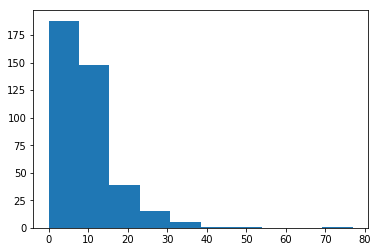

In [9]:
df[df['ScramCount'] == 0]['TotalFindings'].hist(grid=False, bins=10);

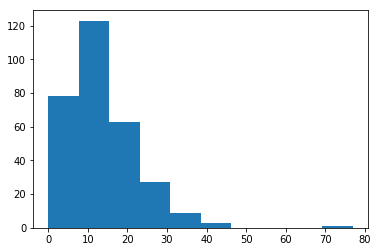

In [10]:
df[df["Column #"] >1]["TotalFindings"].hist(grid = False, bins = 10);

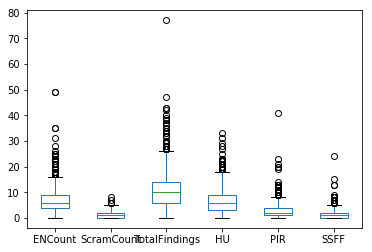

In [11]:
df.drop(["Year", "Column #"], axis = 1).plot(kind = "box");

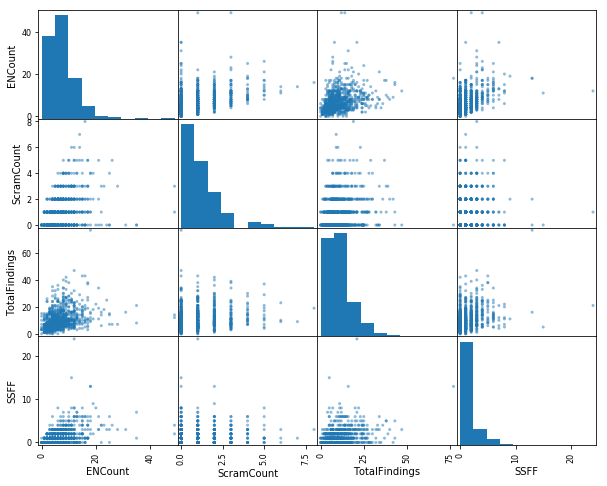

In [12]:
#take a look at correlation plots
pd.plotting.scatter_matrix(df[['ENCount', 'ScramCount', "TotalFindings" , "SSFF"]], figsize=(10, 8));

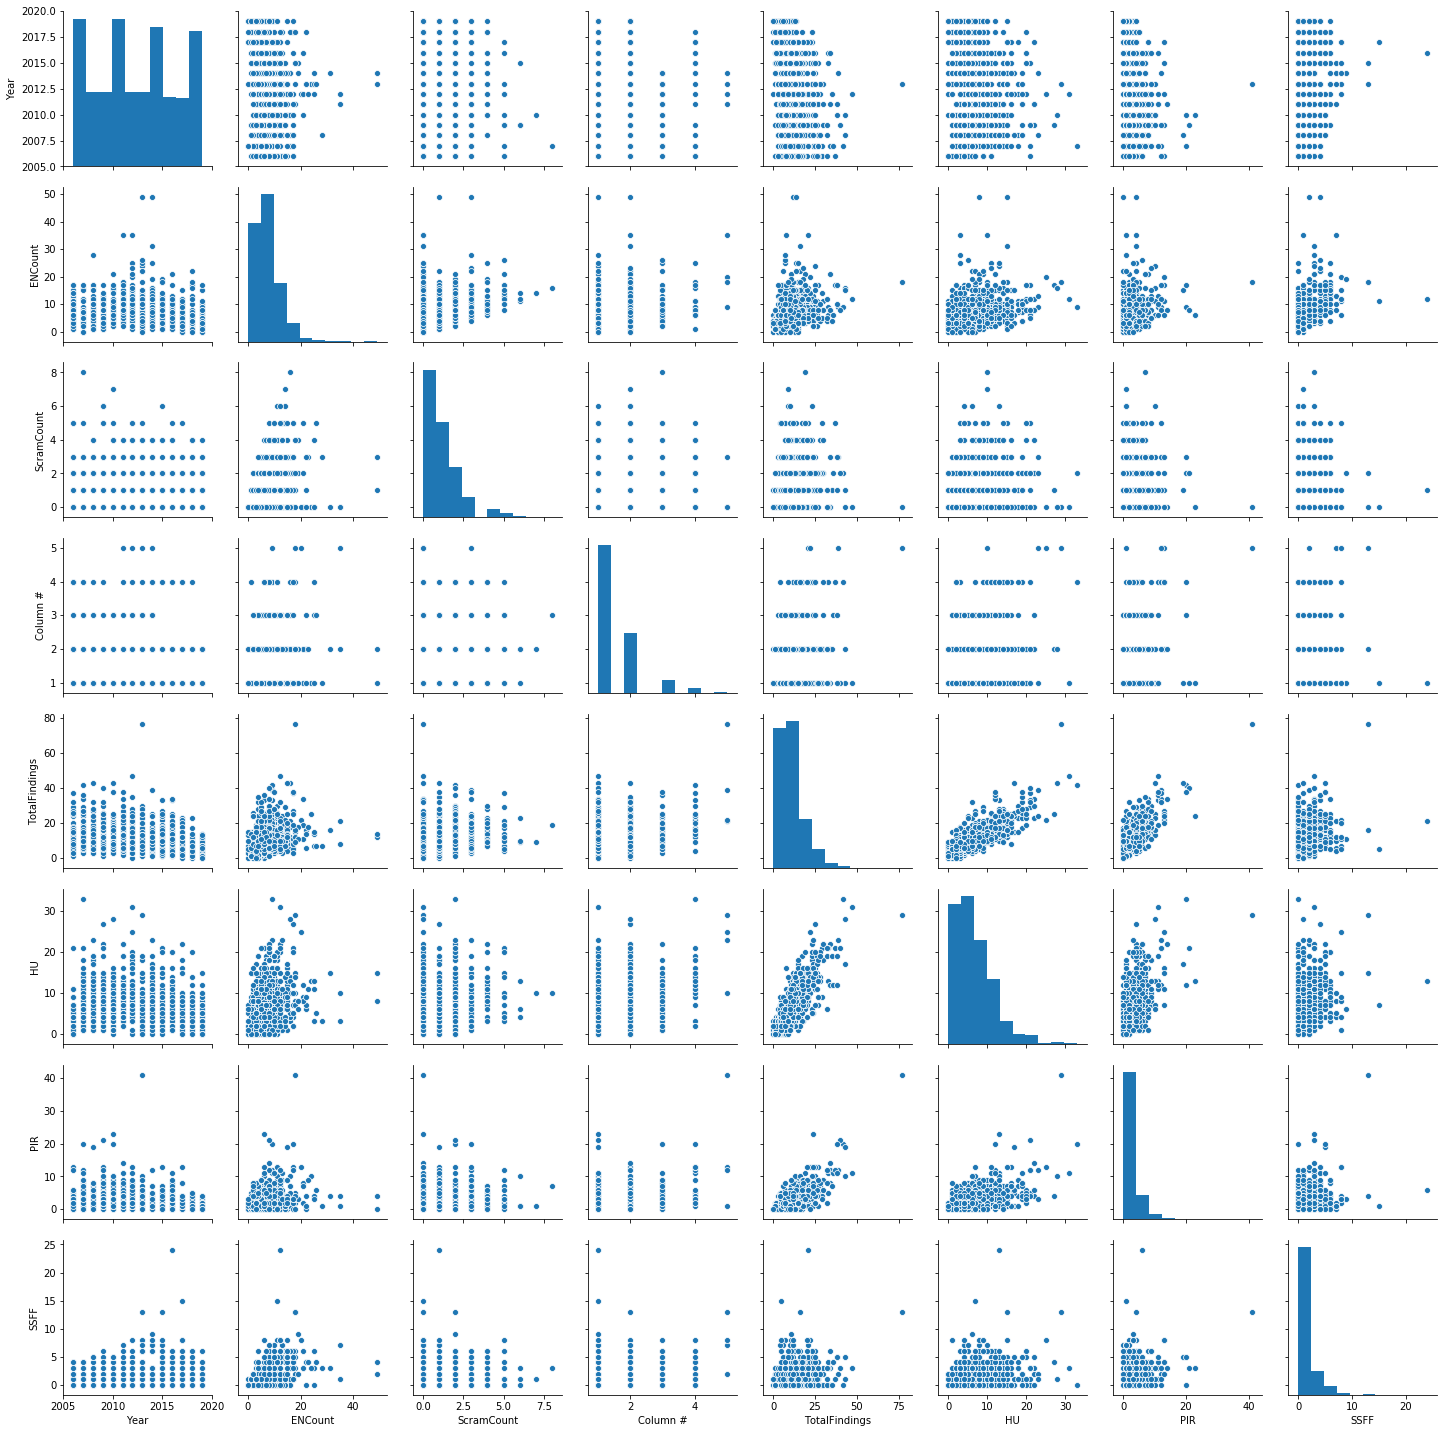

In [14]:
#correlation plots from a different program
sns.pairplot(df);

In [15]:
#check numerical correlation values
df.corr()

,Year,ENCount,ScramCount,Column #,TotalFindings,HU,PIR,SSFF
Year,1.000000,-0.089319,-0.087919,-0.130521,-0.270556,-0.075223,-0.216062,0.107099
ENCount,-0.089319,1.000000,0.360069,0.258928,0.293347,0.291926,0.239180,0.402357
ScramCount,-0.087919,0.360069,1.000000,0.211854,0.173514,0.191244,0.134302,0.084917
Column #,-0.130521,0.258928,0.211854,1.000000,0.345890,0.303051,0.355393,0.200959
TotalFindings,-0.270556,0.293347,0.173514,0.345890,1.000000,0.812762,0.726800,0.289256
HU,-0.075223,0.291926,0.191244,0.303051,0.812762,1.000000,0.542532,0.297760
PIR,-0.216062,0.239180,0.134302,0.355393,0.726800,0.542532,1.000000,0.269225
SSFF,0.107099,0.402357,0.084917,0.200959,0.289256,0.297760,0.269225,1.000000


HU and PIR are mutually exclusive tags applied to the majority of findings, so the high correlation among those three columns is expected.  SSFF events are usually reportable as ENCounts, as are Scrams, so some correlation is expected there.

In [17]:
df_total = df.groupby(by=['Year']).sum()
df_total.head()

,ENCount,ScramCount,Column #,TotalFindings,HU,PIR,SSFF
Year,,,,,,,
2006,422,69,100,771,207,138,65
2007,397,70,107,884,487,254,52
2008,457,75,89,791,471,214,68
2009,448,79,95,817,509,258,76
2010,483,75,98,813,494,248,85


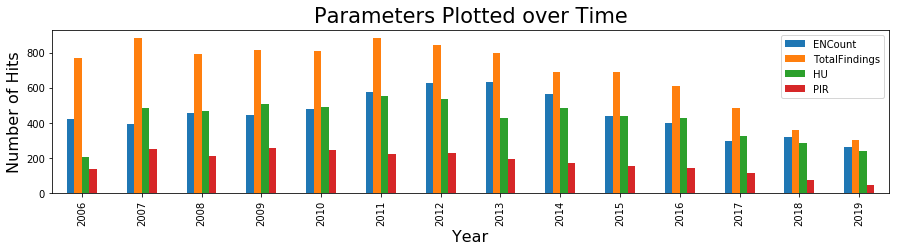

In [18]:
#plot total number of each parameter over time

ax = df_total[["ENCount","TotalFindings","HU","PIR"]].plot(kind='bar', figsize=(15,3));

# Set the title.
ax.set_title('Parameters Plotted over Time', fontsize=21, y=1.01);

# Move the legend.
ax.legend(loc=1);

# x-axis labels
ax.set_ylabel('Number of Hits', fontsize=16);

# y-axis labels
ax.set_xlabel('Year', fontsize=16);

Both ENs and TotalFindings have been declining since about 2014.

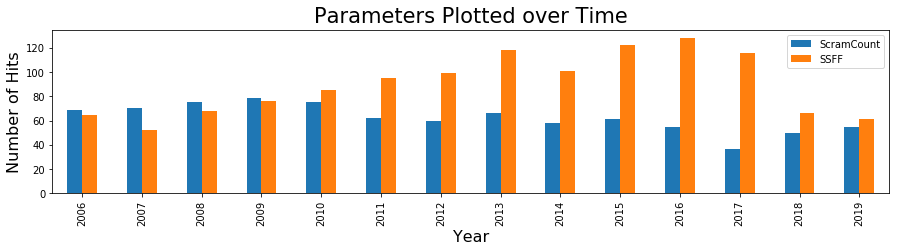

In [20]:
#plot scrams and ssffs over time - on a different axis as they're about a factor of 10 lower than the other parameters
ax1 = df_total[["ScramCount", "SSFF"]].plot(kind='bar', figsize=(15,3));

# Set the title.
ax1.set_title('Parameters Plotted over Time', fontsize=21, y=1.01);

# Move the legend.
ax1.legend(loc=1);

# x-axis labels
ax1.set_ylabel('Number of Hits', fontsize=16);

# y-axis labels
ax1.set_xlabel('Year', fontsize=16);

Something interesting is happening from roughly 2013-2017 with SSFFs up quite a bit from their historical values before dropping back down (a trend that started back as early as 2009 but accelerated in 2013).  